In [3]:
# import MatrixLib
from MatrixLib import *
from importlib import reload
import numpy as np
import numbers
from fractions import Fraction


Общая канва:
* Ввел алгебру (или поле или ВП, не знаю точно) с единицей и нулем, что позволило рекурсивно обрабатывать любую вложенность матриц любых типов
* Ввел <code>\_\_eq__</code>, <code>\_\_neg__</code>,  <code>\_\_truediv__</code>
* <code>\_\_abs__</code> действует аналогично нумпаю
* <code>\_\_sub__</code>, <code>\_\_add__</code>, <code>\_\_rsub__</code> действуют по правилу $A-1 = A- 1E$, где $E$ -- единичный элемент. Такое определение позволило отождествить $E$ и $1$, $0$ и $O$.
* <code>.norm(norm='F')</code> возвращает норму матрицы, F -- фробениуса. Это необходимо, чтобы использовать LUP разложение на волженных матрицах
* Транспонирование <code>.T</code> учитывает вложенность матриц

# 1 Напишите метод lu для класса Matrix, выполняющий LU разложение.

In [2]:
m = FullMatrix(np.array([[2.,2.], [1.,2.]]))
m

| 2.0 2.0 |
| 1.0 2.0 |

In [3]:
a, b = m.lu()
print(a, b ,a*b == m, sep='\n\n')

| 1.0 0.0 |
| 0.5 1.0 |

| 2.0 2.0 |
| 0.0 1.0 |

True


### Красивости:

In [4]:
a / a 

| 1.0 0.0 |
| 0.0 1.0 |

In [5]:
a - 10

| -9.0 0.0  |
| 0.5  -9.0 |

In [6]:
-a

| -1.0 -0.0 |
| -0.5 -1.0 |

In [7]:
a.eye_like()

| 1.0 0.0 |
| 0.0 1.0 |

In [8]:
a.zero_like()

| 0.0 0.0 |
| 0.0 0.0 |

### Еще красивость:

In [9]:
A = a.eye_like()
print('A:', A, sep='\n')

A:
| 1.0 0.0 |
| 0.0 1.0 |


In [10]:
B = FullMatrix([[a.eye_like(), 0], [0, a.eye_like()]])
print('B:', B, sep='\n')

B:
| | 1.0 0.0 | 0           |
| | 0.0 1.0 |             |
|                         |
| 0           | 1.0 0.0 | |
|             | 0.0 1.0 | |


In [11]:
print('A == B', a.eye_like() == FullMatrix([[a.eye_like(), 0], [0, a.eye_like()]]), sep='\n')

A == B
True


# 2 Реализуйте метод det

Сделал уровень вложенности det

In [12]:
m.det()

2.0

Пример вложенности матриц в матрицу матриц. Можно искать det(1) , det(2) и тд. det() -- поиск определителя, пока не будет число

In [13]:
d_m = 2
b_m = 2
d_rand = np.random.randint(1, 100, (d_m, b_m, d_m, b_m))
d_array = 1 / d_rand
vf = np.vectorize(lambda x: FullMatrix([[Fraction(1, x)]]))
d_array_frac = vf(d_rand)
d = FullMatrix(np.array([
    [FullMatrix(d_array_frac[i, :, j, :]) for j in range(d_m)] for i in range(d_m)
]))

print(d)
print()
print(d.det(1))
print()
print(d.det(2))
print()
print(d.det(3))

| | | 1/68 | | 1/64 | | | | 1/59 | | 1/99 | | |
| |                   | |                   | |
| | | 1/86 | | 1/40 | | | | 1/57 | | 1/82 | | |
|                                             |
| | | 1/89 | | 1/24 | | | | 1/5 |  | 1/75 | | |
| |                   | |                   | |
| | | 1/84 | | 1/46 | | | | 1/95 | | 1/39 | | |

| | 49088122663/19548530340480 | | 499039986557/3067253346643200 | |
|                                                                  |
| | 58948144949/30903926641200 | | 301828749923/969793337541600 |  |

| 360335395022783/764745584835735360000 |

360335395022783/764745584835735360000


In [14]:
d_m = 2
b_m = 2
d_rand = np.random.randint(1, 100, (d_m, b_m, d_m, b_m))
d_array = 1 / d_rand
vf = np.vectorize(lambda x: Fraction(1, x))
d_array_frac = vf(d_rand)
d = FullMatrix(np.array([
    [FullMatrix(d_array_frac[i, :, j, :]) for j in range(d_m)] for i in range(d_m)
]))

print(d)
print()
print(d.det(1))
print()
print(d.det(2))

| | 1/4  1/21 | | 1/25 1/54 | |
| | 1/63 1/89 | | 1/91 1/79 | |
|                             |
| | 1/62 1/63 | | 1/41 1/84 | |
| | 1/48 1/13 | | 1/2  1/84 | |

| 2424847688/109048082325     -12044666087/1955058212016 |
| 425758744016/87347513942325 -11336321519/9911402707752 |

18596404154/4046077758033675


# Убедитесь, что ваша реализация LU разложения работает с блочными матрицами.

In [15]:
l, u = d.lu()
print(d, l, u, d == l * u, sep ='\n\n')

| | 1/4  1/21 | | 1/25 1/54 | |
| | 1/63 1/89 | | 1/91 1/79 | |
|                             |
| | 1/62 1/63 | | 1/41 1/84 | |
| | 1/48 1/13 | | 1/2  1/84 | |

| | 1 0 |                       | 0 0 | |
| | 0 1 |                       | 0 0 | |
|                                       |
| | -3098/89931  46725/29977  | | 1 0 | |
| | -24171/50284 446691/50284 | | 0 1 | |

| | 1/4  1/21 | | 1/25 1/54 |                                |
| | 1/63 1/89 | | 1/91 1/79 |                                |
|                                                            |
| | 0 0 |       | 10353184/1198330575 -38604971/5371039044 | |
| | 0 0 |       | 1722512/4085575     -45868891/500526936  | |

True


# Реализуйте LUP разложение с перестановкой строк
Предъявите матрицу, на которой LUP разложение работает, а LU - нет. Пример:

In [16]:
test_a = FullMatrix([[0,1], [2,3]])
test_a.lu()

C:\Users\vigos\JupyterProjects\MatrixLabs\MatrixLabs2022\MatrixLib\Matrixs.py:10: RuntimeWarning: divide by zero encountered in long_scalars
  return 1 / element


OverflowError: cannot convert float infinity to integer

In [17]:
l,u,p = test_a.lup()
l, u, p 

(| 1 0 |
 | 0 1 |,
 | 2 3 |
 | 0 1 |,
 | 0 1 |
 | 1 0 |)

In [18]:
l * u == p * test_a

True

Протестим lup еще на блочных матрицах. Все работает рекурсивно из-за введеения алгебры матриц

In [19]:
l, u, p = d.lup()
l

| | 1 0 |                       | 0 0 | |
| | 0 1 |                       | 0 0 | |
|                                       |
| | -3098/89931  46725/29977  | | 1 0 | |
| | -24171/50284 446691/50284 | | 0 1 | |

In [20]:
p * l * u == d

True

кроме того, я сразу переписал .inverse() на lup вместо lu

# Реализуйте метод прогонки и реализуйте метод Matrix.solve для решения линейных систем уравнений.

Решим d*x = B

In [21]:
print(d)

| | 1/4  1/21 | | 1/25 1/54 | |
| | 1/63 1/89 | | 1/91 1/79 | |
|                             |
| | 1/62 1/63 | | 1/41 1/84 | |
| | 1/48 1/13 | | 1/2  1/84 | |


In [22]:
B = FullMatrix([[1], [0]])
B

| 1 |
| 0 |

In [23]:
x = d.solve(B)
x

| | 4776666699825/1041398632624  4153546551375/148771233232     | |
| | -1655339771475/1190169865856 -329728020274107/1190169865856 | |
|                                                                 |
| | 1109403509175/8331189060992 41995773306825/1190169865856 |    |
| | -43075881675/9298202077     2410766830017/9298202077     |    |

In [24]:
d * x

| | 1 0 | |
| | 0 1 | |
|         |
| | 0 0 | |
| | 0 0 | |

Совпало с B:

In [25]:
d*x == B

True

# Реализуйте класс SymmetricMatrix, хранящий симметричные матрицы. Убедитесь, что метод Matrix.lu корректно работает с этим классом. Модифицируйте этот метод для класса SymmetricMatrix так, чтобы он использовал симметричность матрицы и работал в два раза быстрее.

Получилось. Чтобы создать матрицу, подается весь нумпай массив. По аргументу side='u' или 'd' используется либо верхняя часть массива для заполнения, либо нижняя. При этом блочные матрицы транспонируются, а матрицы, стоящие на диагонали сами становятся экземплярами SymmetricMatrix с тем же параметром side

In [26]:
d_m =2
b_m =2
d_rand = np.random.randint(1, 100, (d_m, b_m, d_m, b_m))
d_array = 1 / d_rand
vf = np.vectorize(lambda x: Fraction(x,1))
d_array_frac = vf(d_rand)
d = SymmetricMatrix(np.array([
    [FullMatrix(d_array_frac[i, :, j, :]) for j in range(d_m)] for i in range(d_m)
]))

L, D = d.ldl()
d

| | 78 63 | | 23 28 | |
| | 63 65 | | 15 47 | |
|                     |
| | 23 15 | | 32 57 | |
| | 28 47 | | 57 37 | |

In [27]:
type(d[0,0]), type(d[0,1])

(MatrixLib.Matrixs.SymmetricMatrix, MatrixLib.Matrixs.FullMatrix)

In [28]:
print('d:',d, 'L:', L, 'D:', D, 'LDLT == d', L * D * L.T == d, sep='\n\n')

d:

| | 78 63 | | 23 28 | |
| | 63 65 | | 15 47 | |
|                     |
| | 23 15 | | 32 57 | |
| | 28 47 | | 57 37 | |

L:

| | 1 0 |                | 0 0 | |
| | 0 1 |                | 0 0 | |
|                                |
| | 550/1101   -93/367 | | 1 0 | |
| | -1141/1101 634/367 | | 0 1 | |

D:

| | 78 63 | | 0 0 |                    |
| | 63 65 | | 0 0 |                    |
|                                      |
| | 0 0 |   | 26767/1101 60470/1101  | |
| | 0 0 |   | 60470/1101 -16709/1101 | |

LDLT == d

True


# Реализуйте класс BandMatrix для хранения ленточных матриц. Убедитесь в работоспособности методов lu и solve.

Проверка того, что можно делать .inverse()

In [29]:
p = {
    -1: [Fraction(-91), Fraction(17), 0],
    0: [Fraction(-93), Fraction(45), Fraction(88), Fraction(33)],
    1: [Fraction(91), Fraction(17), 0],
}
BM = BandMatrix(p)
print(BM)
print('E = BM*BM^-1:')
print(BM * BM.inverse())

| -93 91 0  0  |
| -91 45 17 0  |
| 0   17 88 0  |
| 0   0  0  33 |
E = BM*BM^-1:
| 1 0 0 0 |
| 0 1 0 0 |
| 0 0 1 0 |
| 0 0 0 1 |


### Проверка матрицы $m$ из матриц

In [30]:
def block_FullMatrix(m: int, n: int, start_from: int = 1):
    a = np.array([Fraction(x) for x in range(start_from, start_from + m*n)]).reshape((m, n))
    return FullMatrix(a)

p = {
    0: [block_FullMatrix(2, 2, np.random.randint(0,10)) for i in range(4)],
    1: [block_FullMatrix(2, 2, np.random.randint(0,10)) for i in range(3)],
    -2: [block_FullMatrix(2, 2, np.random.randint(0,10)) for i in range(2)],
}

m = BandMatrix(p)
m

| | 0 1 |  | 7 8  |  0       0         |
| | 2 3 |  | 9 10 |                    |
|                                      |
| 0        | 9  10 | | 2 3 | 0         |
|          | 11 12 | | 4 5 |           |
| | 7 8  | 0         | 6 7 | | 8  9  | |
| | 9 10 |           | 8 9 | | 10 11 | |
|                                      |
| 0        | 0 1 |   0       | 9  10 | |
|          | 2 3 |           | 11 12 | |

Проверка, что lu сработает

In [31]:
m.lu()[0] * m.lu()[1] == m

True

Проверка, что lup сработает

In [32]:
m.lup()[2] * m.lup()[0] * m.lup()[1] == m

True

Проверка солвера. $m x = e_1$

In [33]:
e = FullMatrix([[1],[0],[0],[0]])
x = m.solve(e)
print(m * x == e)
m, e 

True


(| | 0 1 |  | 7 8  |  0       0         |
 | | 2 3 |  | 9 10 |                    |
 |                                      |
 | 0        | 9  10 | | 2 3 | 0         |
 |          | 11 12 | | 4 5 |           |
 | | 7 8  | 0         | 6 7 | | 8  9  | |
 | | 9 10 |           | 8 9 | | 10 11 | |
 |                                      |
 | 0        | 0 1 |   0       | 9  10 | |
 |          | 2 3 |           | 11 12 | |,
 | 1 |
 | 0 |
 | 0 |
 | 0 |)

## Воспользуйтесь реализованными классами для решения уравнения Пуассона Δf=g, использую операцию Лапласа из предыдущей лабораторной.

### 1 вариант
Используем фуллматрицу. Но .solve делал для симметричных, потому что так быстрее)

In [5]:
import matplotlib.pyplot as plt

In [153]:
def Laplace(N = 3,M = 4):
    L = np.zeros((N,M,N,M), dtype=int)
#     a, b, c, d, e = 'a', 'b', 'c', 'd', 'e'
#     a, b, c, d, e = 1, 1, 1, 1, -4
    a, b, c, d, e = Fraction(1), Fraction(1), Fraction(1), Fraction(1), Fraction(-4)
    
    indNdiag = np.arange(N)
    indNup = np.roll(indNdiag, 1)
    indNdown = np.roll(indNdiag, -1)
    
    indMdiag = np.arange(M)
    indMup = np.roll(indMdiag, 1)
    indMdown = np.roll(indMdiag, -1)
    
    for n in range(N):
        L[n,indMdiag,indNdiag[n],indMdiag] = e
        L[n,indMup,indNdiag[n],indMdiag] = c
        L[n,indMdown,indNdiag[n],indMdiag] = d

        L[n,indMdiag,indNup[n],indMdiag] = b

        L[n,indMdiag,indNdown[n],indMdiag] = a

    return L.reshape(N*M, N*M)




Text(0.5, 1.0, 'g')

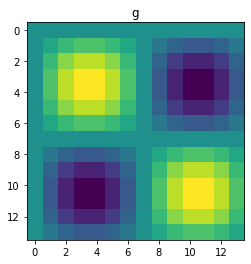

In [154]:
M = 14
N = 14
x, y = np.meshgrid(np.linspace(0, 2*np.pi, M, endpoint=False), np.linspace(0, 2*np.pi, N, endpoint=False))
u = np.sin(x)*np.sin(y)
g = FullMatrix(u.reshape(1,N * M).T)

Л = Laplace(M,N)
Delta = SymmetricMatrix(Л)

plt.imshow(u)
plt.title('g')

In [155]:
f = Delta.solve(g)

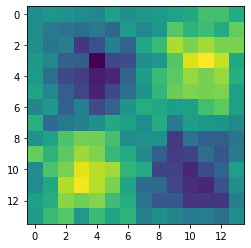

In [156]:
plt.imshow(np.array(f.data.reshape(M,N), dtype= float))

### 2 вариант.
Используем блочную фулл матрицу

In [140]:
def Laplace_matrix(N = 3,M = 4):
    L = np.zeros((N,N), dtype=object)
#     a, b, c, d, e = 'a', 'b', 'c', 'd', 'e'
    a, b, c, d, e = 1, 1, 1, 1, -4
#     a, b, c, d, e = Fraction(1), Fraction(1), Fraction(1), Fraction(1), Fraction(-4)
    
    indMdiag = np.arange(M)
    indMup = np.roll(indMdiag, 1)
    indMdown = np.roll(indMdiag, -1)
    
    diag_array = np.array([[Fraction(0) for _ in range(M)] for _ in range(M)])
    diag_array[indMdiag,indMdiag] = e
    diag_array[indMdiag,indMup] = b
    diag_array[indMdiag,indMdown] = a
    diag_blok = SymmetricMatrix(diag_array)
    
    for n in range(N):
        L[n,n] = diag_blok
        L[n,(n+1)%N] = 1
        L[n,n-1] = 1
    return SymmetricMatrix(L)
Laplace_matrix(4,4)

| | -4 1  0  1  | 1               0               1               |
| | 1  -4 1  0  |                                                 |
| | 0  1  -4 1  |                                                 |
| | 1  0  1  -4 |                                                 |
|                                                                 |
| 1               | -4 1  0  1  | 1               0               |
|                 | 1  -4 1  0  |                                 |
|                 | 0  1  -4 1  |                                 |
|                 | 1  0  1  -4 |                                 |
| 0               1               | -4 1  0  1  | 1               |
|                                 | 1  -4 1  0  |                 |
|                                 | 0  1  -4 1  |                 |
|                                 | 1  0  1  -4 |                 |
| 1               0               1               | -4 1  0  1  | |
|                                               

Text(0.5, 1.0, 'g')

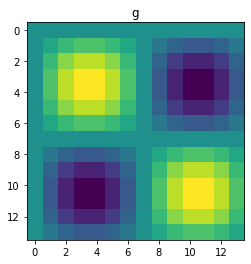

In [150]:
M = 14
N = 14
x, y = np.meshgrid(np.linspace(0, 2*np.pi, M, endpoint=False), np.linspace(0, 2*np.pi, N, endpoint=False))
u = np.sin(x)*np.sin(y)
g = FullMatrix([[FullMatrix([[u[n,m]] for m in range(M)])] for n in range(N)])

Delta = Laplace_matrix(M,N)

plt.imshow(u)
plt.title('g')

In [151]:
f = Delta.solve(g)

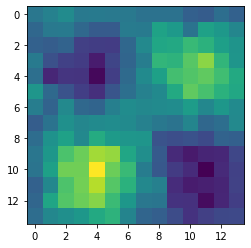

In [152]:
plt.imshow(np.array([x[0].data for x in f.data], dtype= float))